In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

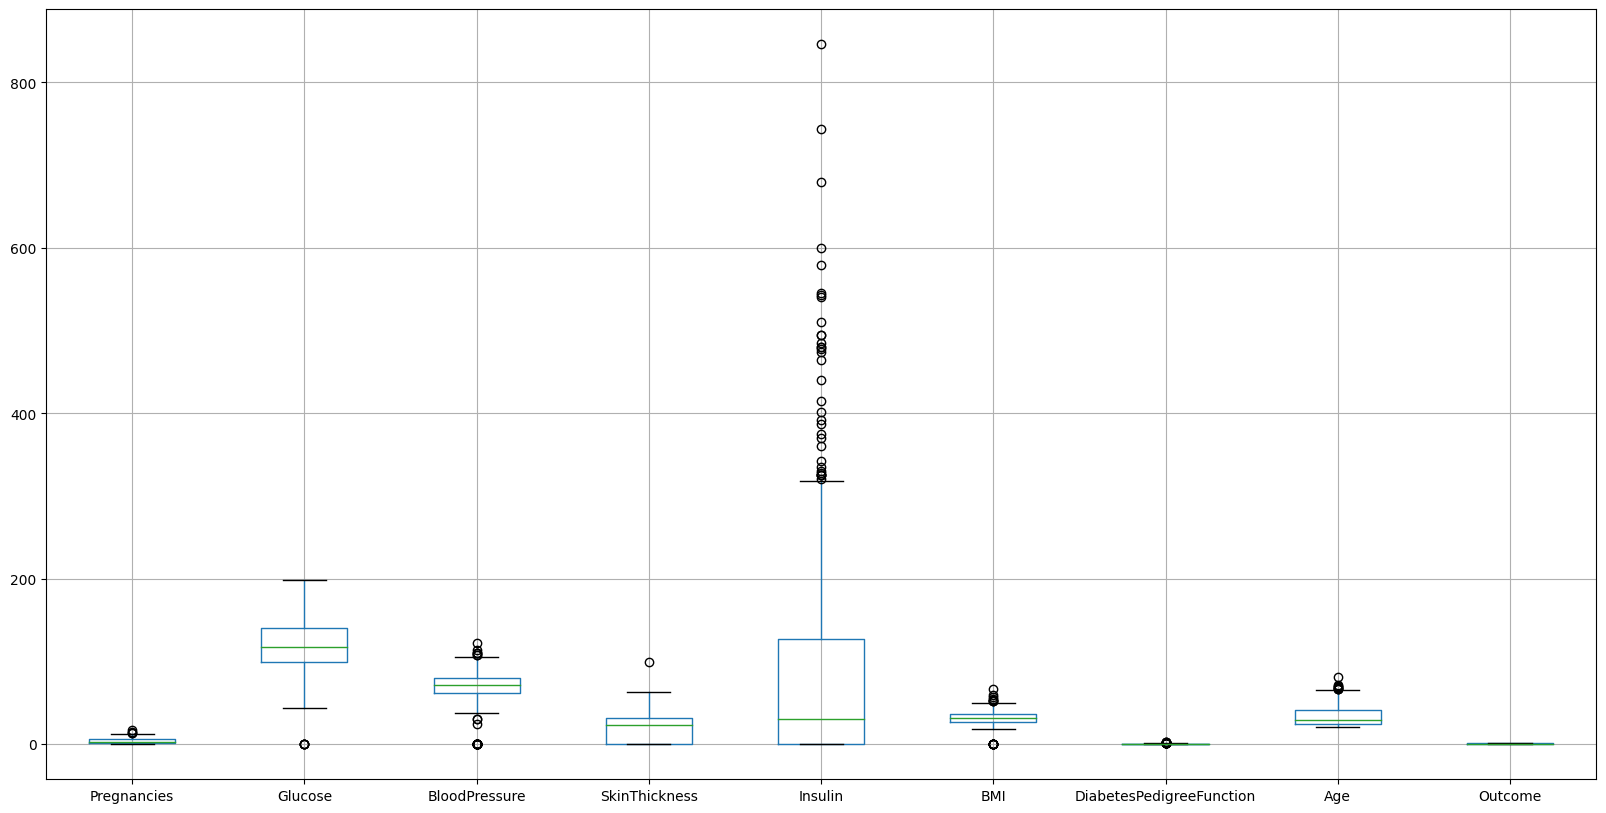

In [5]:
df.boxplot(figsize=(20,10))

In [ ]:
# scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
x = df.drop(['Pregnancies','Age','Outcome'],axis=1)
y = df[['Pregnancies','Age','Outcome']]

In [11]:
y.head()

,Pregnancies,Age,Outcome
0,6,50,1
1,1,31,0
2,8,32,1
3,1,21,0
4,0,33,1


In [12]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,35,0,33.6,0.627
1,85,66,29,0,26.6,0.351
2,183,64,0,0,23.3,0.672
3,89,66,23,94,28.1,0.167
4,137,40,35,168,43.1,2.288


In [13]:
newx = minmax.fit_transform(x)

In [15]:
x = pd.DataFrame(newx,columns=('Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'))

In [16]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [17]:
df=pd.concat([x,y],axis=1)

In [ ]:
# NAIVE BAYES MODEL WITH CLASSIFICATION  / IT CAN ONLY DONE ON CLASSIFICATION DATASET

In [18]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,6,50,1
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,1,31,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,8,32,1
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,1,21,0
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0,33,1


In [19]:
x = df.drop('Outcome',axis=1)
x1=pd.DataFrame(x)
y = df['Outcome']
y1=pd.DataFrame(y)

In [20]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [21]:
print(x1_train)
print(x1_test)
print(y1_test)
print(y1_train)

      Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
357  0.648241       0.000000       0.303030  0.000000  0.594635   
73   0.648241       0.704918       0.202020  0.319149  0.523100   
352  0.306533       0.672131       0.282828  0.000000  0.512668   
497  0.407035       0.590164       0.151515  0.089835  0.448584   
145  0.512563       0.614754       0.232323  0.000000  0.000000   
..        ...            ...            ...       ...       ...   
71   0.698492       0.524590       0.353535  0.165485  0.426230   
106  0.482412       1.000000       0.000000  0.000000  0.333830   
270  0.507538       0.704918       0.373737  0.000000  0.679583   
435  0.708543       0.000000       0.000000  0.000000  0.631893   
102  0.628141       0.786885       0.000000  0.000000  0.335320   

     DiabetesPedigreeFunction  Pregnancies  Age  
357                  0.209650           13   44  
73                   0.065329            4   23  
352                  0.070453            3   

In [22]:
from sklearn.naive_bayes import GaussianNB
NSG = GaussianNB()
model1 = NSG.fit(x1_train,y1_train)
y1_pred1 = model1.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.naive_bayes import MultinomialNB
NSM = MultinomialNB()
model2 = NSM.fit(x1_train,y1_train)
y1_pred2 =model2.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.naive_bayes import BernoulliNB
NBB = BernoulliNB()
model3 = NBB.fit(x1_train,y1_train)
y1_pred3 = model3.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# model validation checking
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [29]:
#accuracy_score
acc_score1=accuracy_score(y1_test,y1_pred1)
acc_score2=accuracy_score(y1_test,y1_pred2)
acc_score3=accuracy_score(y1_test,y1_pred3)
print(acc_score1)
print(acc_score2)
print(acc_score3)

0.734375
0.6927083333333334
0.640625


In [30]:
# so the gaussien model is giving greater prediction lets test

In [31]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,6,50
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,1,31
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,8,32
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,1,21
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0,33


In [32]:
model1.predict([[0.427136,	0.540984,	0.292929,	0.000000,	0.396423,	0.116567,	1,	31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [33]:
model1.predict([[0.919598,	0.524590,	0.000000,	0.000000,	0.347243,	0.253629,	8,	32]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])